# Insurance Claims- Fraud Detection

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

# Importing Data

In [1]:
import pandas as pd
Insurance=pd.read_csv("Insurance.csv",sep=",") #reading Insurance.csv file
Insurance.head() #Looking into top 5 rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [2]:
Insurance.shape #Checking the shape of our data

(1000, 40)

In [3]:
Insurance.dtypes #Checking the datatype of each attribute

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

As per problem statement Target variable i.e. Fraud Reported is Yes or No. so we'll use Classification to learn our model.

# Exploratory Data Analysis

## Handling Null Values

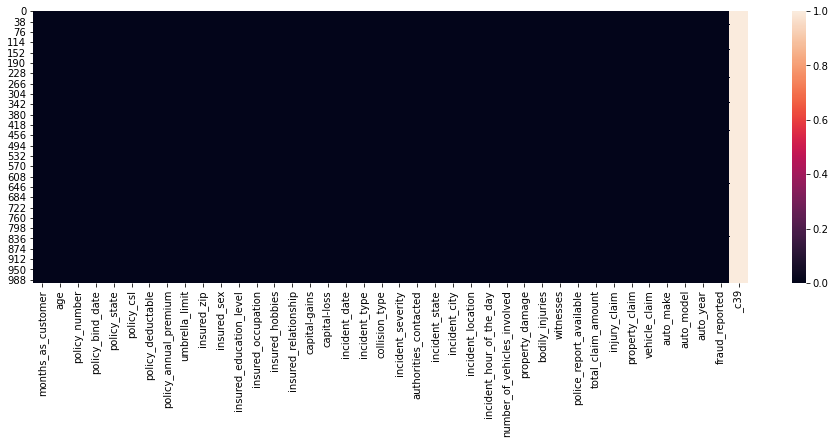

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (16,5))
sns.heatmap(Insurance.isnull()) #Looking for null values if any, in heatmap

In [5]:
#Cheking what is inside _c39 column
Insurance['_c39'].unique()

array([nan])

In [6]:
#_c39 doesn't have any value accross all the rows, So we'll drop it.
Insurance.drop('_c39', axis=1, inplace=True)

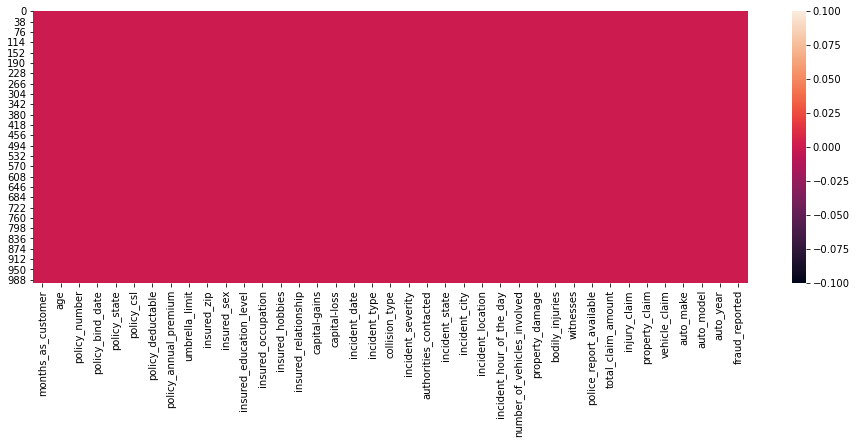

In [7]:
#Cheking null values again
plt.figure(figsize = (16,5))
sns.heatmap(Insurance.isnull()) #Looking for null values if any, in heatmap

In [8]:
Insurance.isin(['?']).sum() #Checking for ? values in dataset

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [9]:
#Checking collision_type unique values with value count
Insurance['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [10]:
#Checking property_damage unique values with value count
Insurance['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [11]:
#Checking police_report_available unique values with value count
Insurance['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [12]:
# Replacing '?' by the most common collision type using mode
Insurance['collision_type']=Insurance['collision_type'].replace('?', 'Rear Collision')

# If there is no values in property_damage then it means no property damage.
Insurance['property_damage']=Insurance['property_damage'].replace('?', 'NO')

# If there is nothing in police_report_available, that means there is no FIR and nothing.
Insurance['police_report_available']=Insurance['police_report_available'].replace('?', 'NO')

In [13]:
Insurance.isin(['?']).sum() #Checking for ? values in dataset

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Univariate Analysis

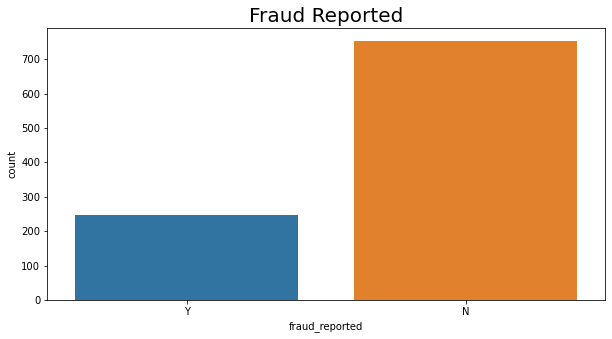

In [14]:
plt.figure(figsize = (10,5)) #Plotting with size of 10 * 5
sns.countplot(x="fraud_reported", data=Insurance) #Plotting Countplot for fraud_reported
plt.title("Fraud Reported", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

We can clearly see that near 200-300 Fraud happened where more than 700 time Fraud didn't happen.

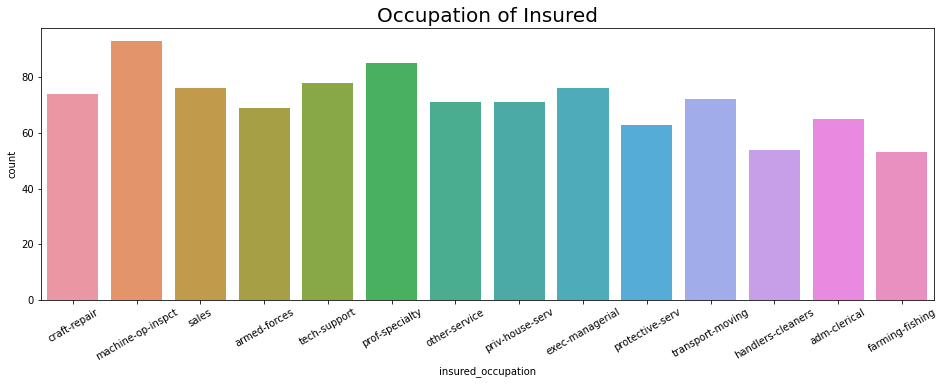

In [15]:
plt.figure(figsize = (16,5)) #Plotting with size of 10 * 5
ax=sns.countplot(x="insured_occupation", data=Insurance) #Plotting Countplot for insured_occupation
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Occupation of Insured", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

Machine-op-inspct people have more insurance where as handlers-cleaners have less number of insurance policy.

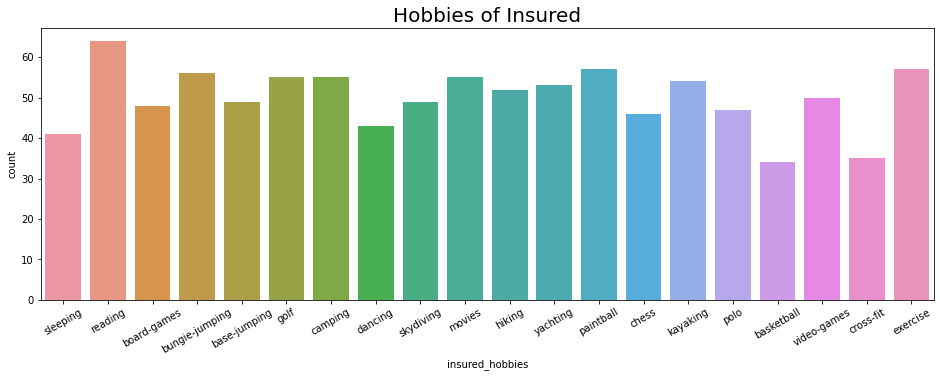

In [16]:
plt.figure(figsize = (16,5)) #Plotting with size of 10 * 5
ax=sns.countplot(x="insured_hobbies", data=Insurance) #Plotting Countplot for insured_sex
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Hobbies of Insured", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

People who took insurance policy have more number of peoples who have reading habbits where as people who play basketball have less policies.

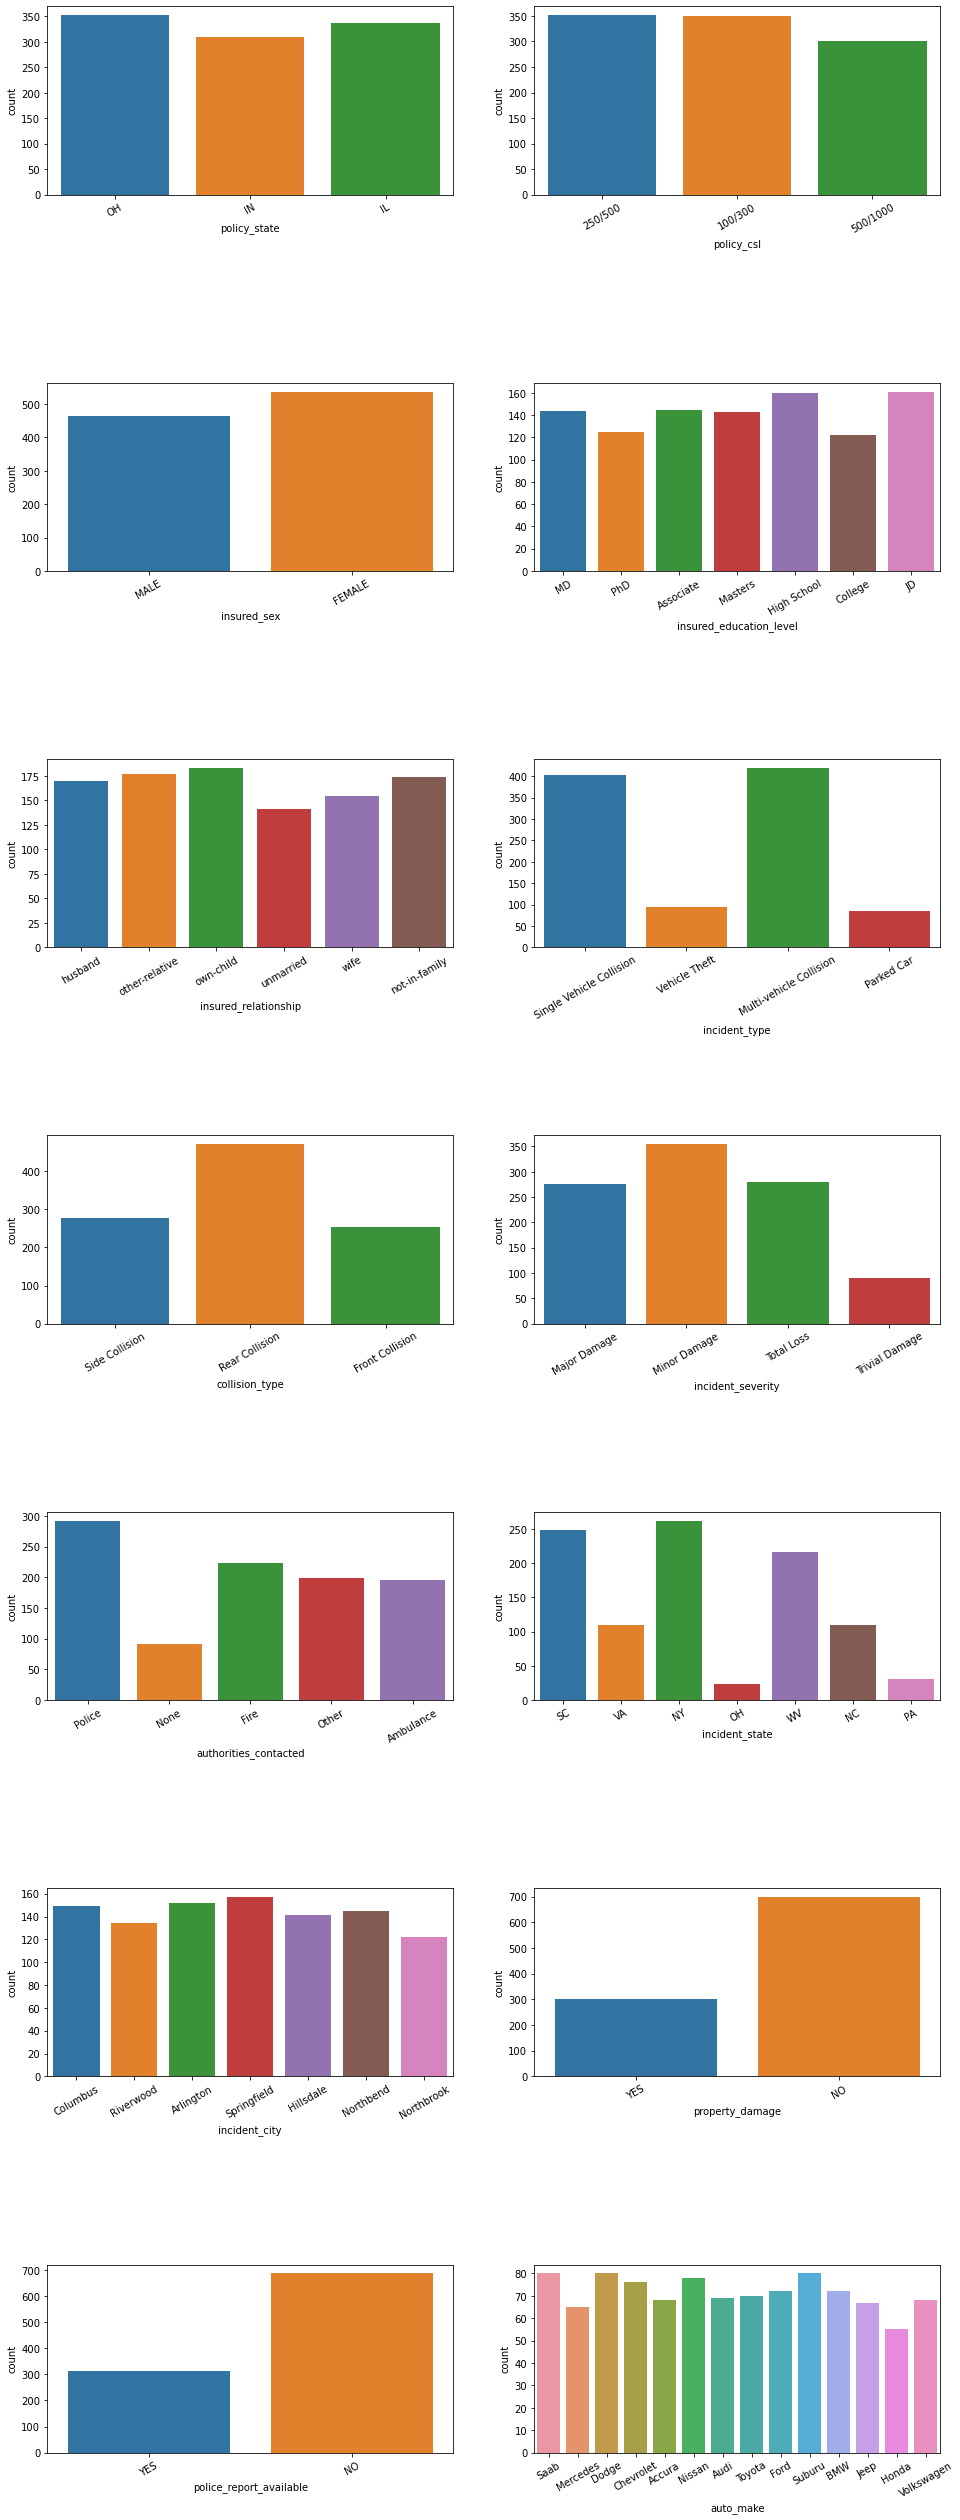

In [17]:
label_list = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make']
fig,axes = plt.subplots(7,2,figsize=(16,45))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    ax=sns.countplot(x=cat,data=Insurance,ax=axes[row,col]) #Plotting count plot with hue Loan Status
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1) # Plotting the graphs

Policy_state is high in OH and IL where as low in IN.

Policy_csl is 250/500 and 100/300 is high where as 500/1000 is less.

Female applied for Insurance more than Male.

Mosty insured person have education level High School and JD.

The person who have child, those peoples did insurances more.

Singlie Vehicle Collision and Multi vehicle Collision had more incident where as Vehile Theft and Parked car incidents are less.

Rear Collision is more than 400 where as Front collision is less.

Minor Damages are happen more where as Trival Damages are less.

People contacted more and in very less conditions people didn't call to anyone.

More incident happen in NY where as in OH very less incident happen.

Almost all cities have same number of incidents.

Property damages are less.

Police reports are available only in 30% cases.

All cars are insured equally near 60-80.

## Bi-variate Analysis

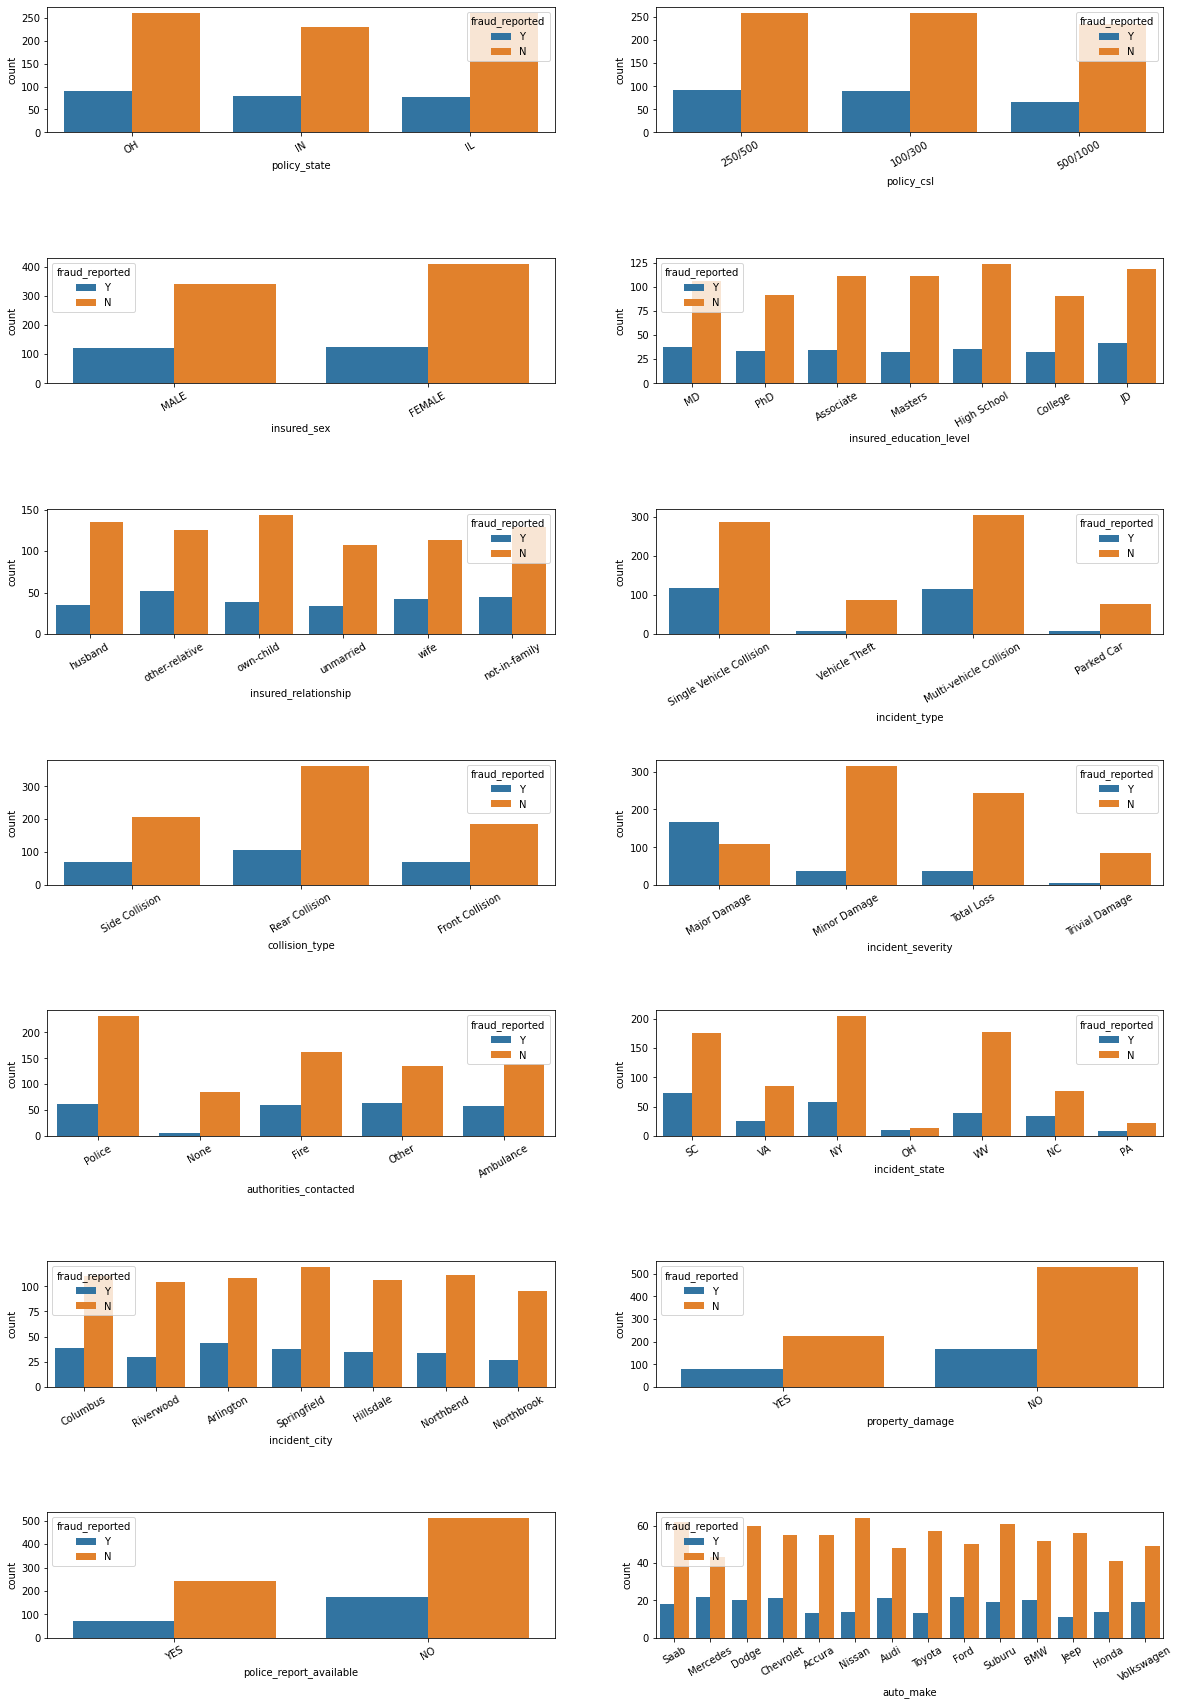

In [18]:
fig,axes = plt.subplots(7,2,figsize=(20,30))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    ax=sns.countplot(x=cat,data=Insurance,hue='fraud_reported',ax=axes[row,col]) #Plotting count plot with hue Loan Status
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1) # Plotting the graphs

In OH and IL Policy state Fraud didn't happen much when comapred with IN. In IN Fraud happen more than OH and IL.

In Policy_csl 250/500 and 100/300 Fraud reported more than 500/1000.

More number of Fraud case reported against Female.

Person who have education level JD did more frauds than others.

People who have other relatives has reported highest fraude cases.

In case of Singlie Vehicle Collision and Multi vehicle Collision maximum frauds happened.

When Collision type is Rear, Fraud reported more.

At the time of Major Damages, Fraud is reported too high.

When People didn't call to anyone that time Fraud happen very less. If person contacted to anyone, Fraud happened.

In SC state Fraue Reported more than other states.

Almost all cities have same number of Fraud Reported.

When Property is not damages that time Fraud happed more.

When there is no Police report available that time Fraaud happen more.

Mercedes and Ford have more number of Fraud Reported.

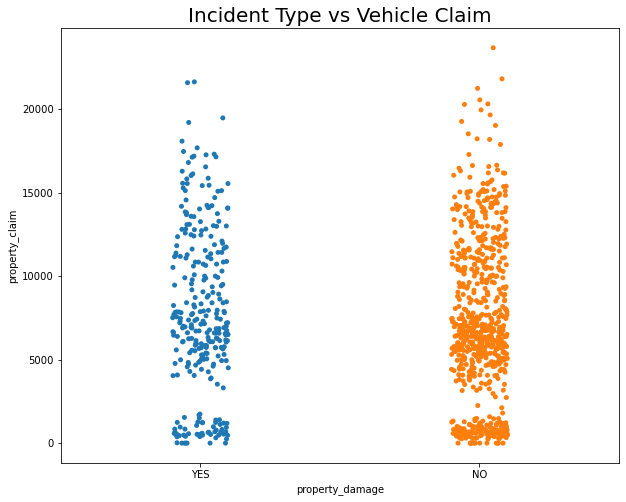

In [19]:
plt.figure(figsize = (10,8))
sns.stripplot(Insurance['property_damage'], Insurance['property_claim'])
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

We can clearly see that People ask for claim regardless of whether property damage or not.

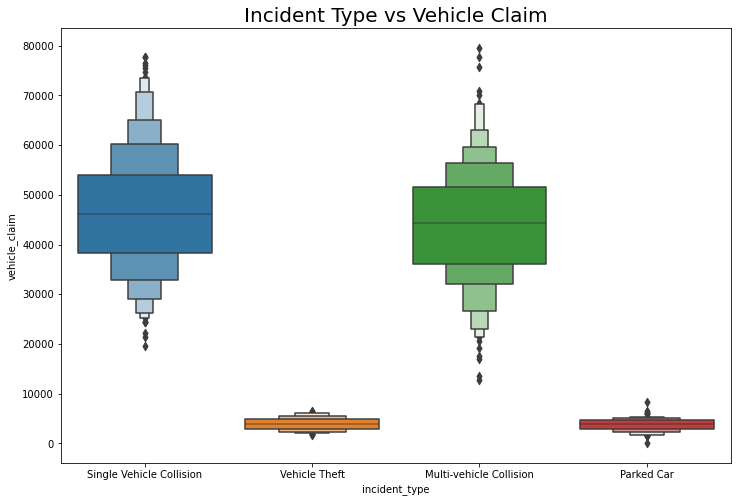

In [20]:
plt.figure(figsize = (12,8))
sns.boxenplot(Insurance['incident_type'], Insurance['vehicle_claim'])
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

We can clearly see People do Vehicle claim when Single Vehicle Collision or Multi-vehicle Collision happen. 

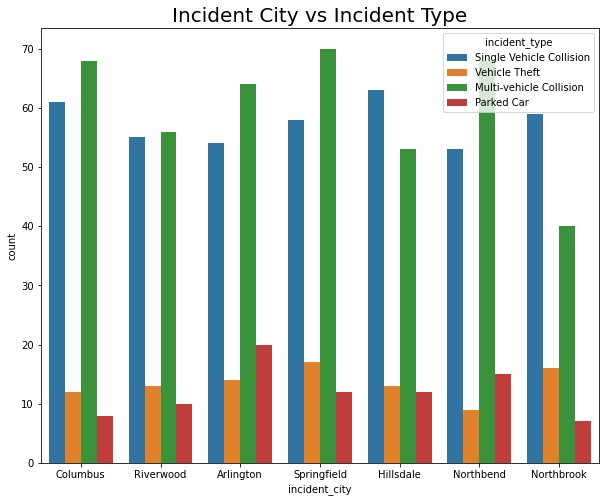

In [21]:
plt.subplots(figsize=(10, 8))
sns.countplot(x='incident_city',hue='incident_type',data=Insurance)
plt.title('Incident City vs Incident Type', fontsize = 20)
plt.show()

We can clearly see that in every city Single Vehicle Collision and Multi-vehicle Collision happened most of the times.

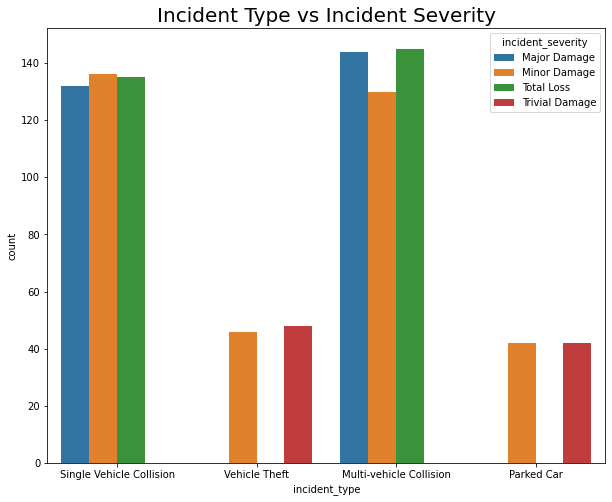

In [22]:
plt.subplots(figsize=(10, 8))
sns.countplot(x='incident_type',hue='incident_severity',data=Insurance)
plt.title('Incident Type vs Incident Severity', fontsize = 20)
plt.show()

We can clearly see that In Single Vehicle collision and Multi-vehicle collision, Mjor Damage,Minor Damage and Total loss happened, where as when Vehicle is Theft or car was parked that time Minor damage and Trival Damage happen.

# Multi-Variate Analysis

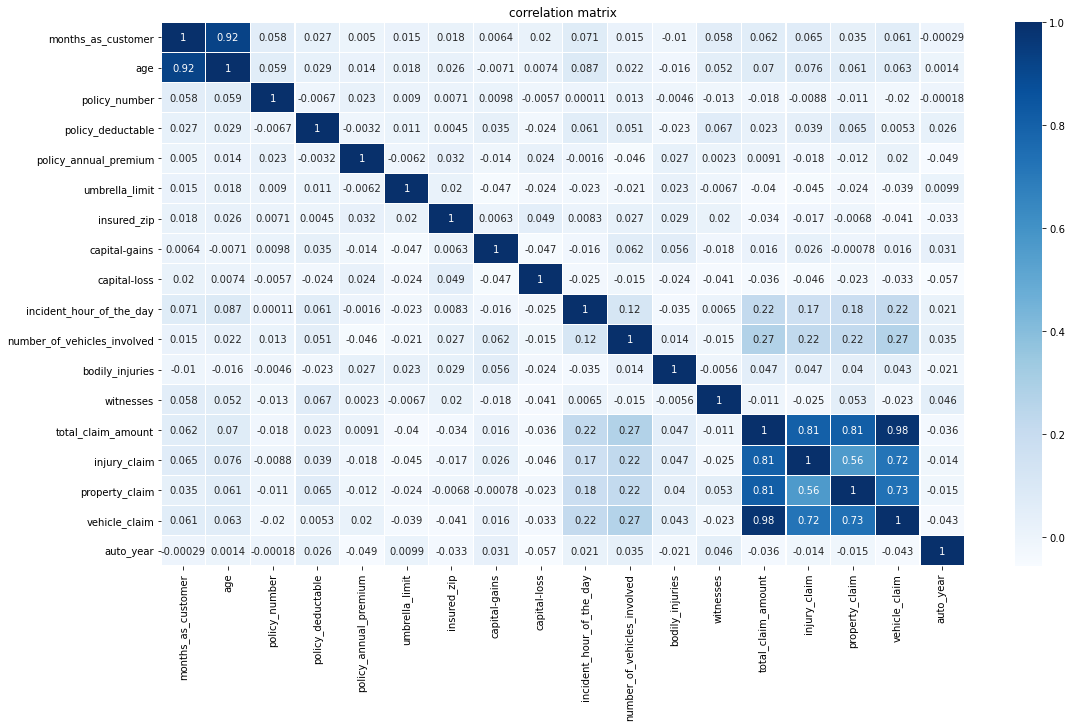

In [23]:
fig=plt.figure(figsize=(18,10))
hc=Insurance.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

We need to check the correlation of all columns with or target column fraud_reported. Datatype of target column is Object so we cannot see that column. We'll change the data type of target column and other object type columns too for better understanding.

In [24]:
Insurance.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Too much difference in values so Scaling is required.
Few columns have too much difference in mean, median and std, so outliers and skewness it also present in the data. We'll remove that also.

# Feature Engineering

In [25]:
Insurance['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [26]:
Insurance['csl_per_person']=Insurance.policy_csl.str.split('/',expand=True)[0]
Insurance['csl_per_accident']=Insurance.policy_csl.str.split('/',expand=True)[1]

In [27]:
#Converting Auto Year into Vehicle Age by subtracting 2020
Insurance['vehicle_age'] = 2020 - Insurance['auto_year']

In [28]:
Insurance=Insurance.drop(['policy_csl', 'auto_year', 'policy_number', 'insured_zip', 'policy_bind_date', 'incident_date','incident_location','incident_hour_of_the_day'], axis = 1)

Reason behind dropping these columns -

    Policy number is unique for each policy.
    Insured Zip is pin code from where policy created.
    Policy bind date is policy date.
    Incident date is the date when incident happen.
    Incident location is where incident happen.
    Incident hour of the day is what what time incident happen.
    All of those columns are not gonna help us to predict something, So we'll drop these columns.

In [29]:
Insurance.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,71610,6510,13020,52080,Saab,92x,Y,250,500,16
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,5070,780,780,3510,Mercedes,E400,Y,250,500,13
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,34650,7700,3850,23100,Dodge,RAM,N,100,300,13
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,6
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,6500,1300,650,4550,Accura,RSX,N,500,1000,11


In [30]:
#Getting all columns i.e. (int64) values in int_label
int_label=list(Insurance.select_dtypes(['int64']).columns)

# Label Encoding

In [31]:
label_list=list(Insurance.select_dtypes(['object']).columns) #Getting the list of object columns in label_list 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #initilizing Label Encoder
for i in label_list:
    Insurance[i] = le.fit_transform(Insurance[i]) #Converting Object coulmns to number's using label encoder

In [32]:
Insurance.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,2,1000,1406.91,0,1,4,2,17,...,71610,6510,13020,52080,10,1,1,1,2,16
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,5070,780,780,3510,8,12,1,1,2,13
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,34650,7700,3850,23100,4,30,0,0,1,13
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,63400,6340,6340,50720,3,34,1,1,2,6
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,6500,1300,650,4550,0,31,0,2,0,11


# Removing Skewness and Outliers

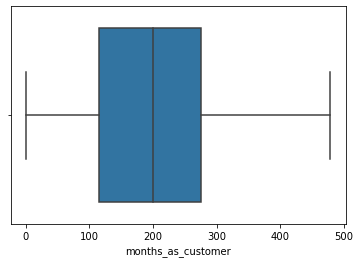

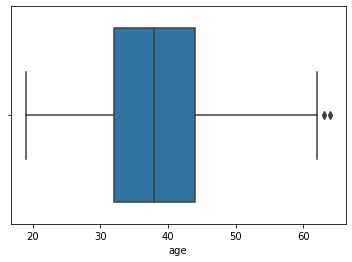

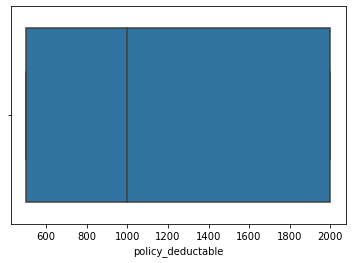

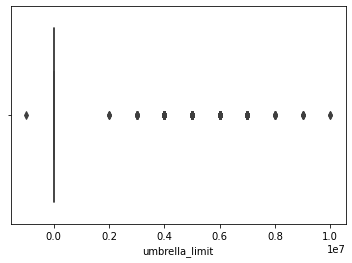

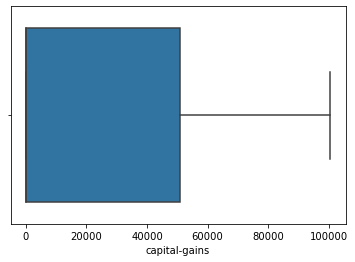

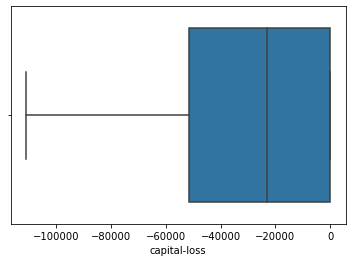

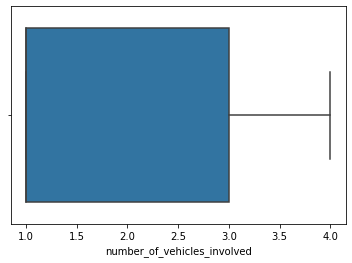

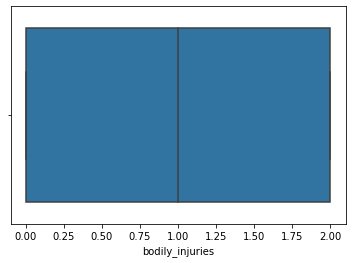

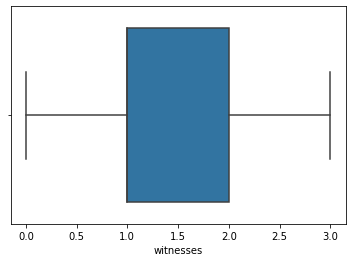

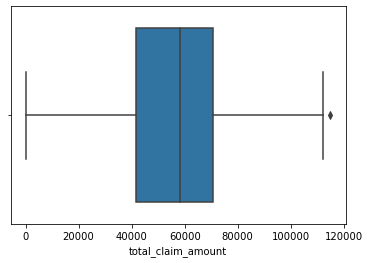

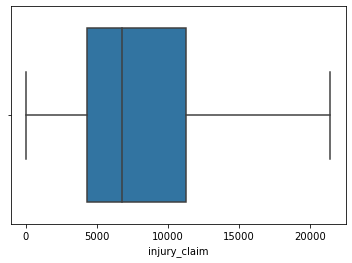

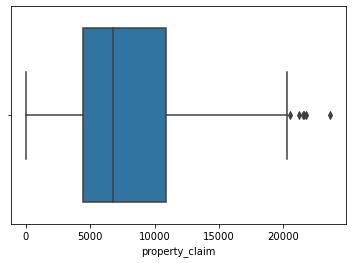

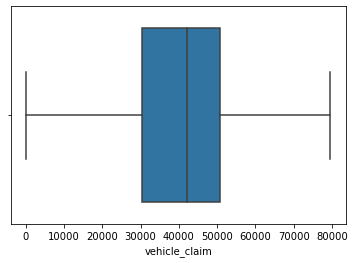

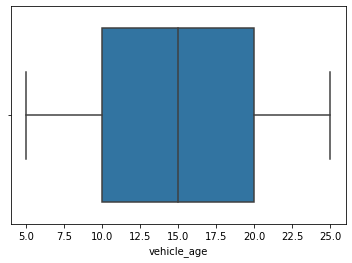

In [33]:
for i in int_label:
    plt.figure()
    sns.boxplot(x=Insurance[i])

Umberalla limit have many outliers and Property_claim, total_claim_amount,age few  outliers.

In [34]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Insurance))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 26,  5,  5,  5,  4, 12,
        5,  5,  5], dtype=int64))


In [35]:
#Removing the outliers
import scipy
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Insurance))
threshold=3
new_Insurance=Insurance[(z<3).all(axis=1)]
print(Insurance.shape)
print(new_Insurance.shape)

(1000, 34)
(980, 34)


In [36]:
#checking for how much data we lost
loss_percent=(1000-980)/1000*100
print(loss_percent)

2.0


In [37]:
#Checking skewness of all columns
new_Insurance.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.593593


In [38]:
Insurance['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [39]:
#Looks like umbrella_limit have few values and feels like catagorical, So we'll not change it's skewness.
int_label.remove('umbrella_limit')

In [40]:
#Removing skewness from non object columns
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in int_label:
    if abs(new_Insurance.loc[:,i].skew())>0.55:
        new_Insurance.loc[:,i]=PT.fit_transform(new_Insurance.loc[:,i].values.reshape(-1,1))

In [41]:
new_Insurance.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.508540


All the numerical columns skewness is under .55 

# Seperating Input and Output Variables

In [42]:
x = new_Insurance.drop("fraud_reported", axis=1)
y = new_Insurance["fraud_reported"]

# Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,csl_per_person,csl_per_accident,vehicle_age
0,0.684760,0.644444,1.0,0.333333,0.606891,0.125,1.0,0.666667,0.153846,0.894737,...,1.0,0.601570,0.303497,0.596974,0.630462,0.769231,0.026316,0.5,1.0,0.55
1,0.475992,0.511111,0.5,1.000000,0.460404,0.750,1.0,0.666667,0.461538,0.789474,...,0.0,0.034552,0.036364,0.035763,0.033065,0.615385,0.315789,0.5,1.0,0.40
2,0.279749,0.222222,1.0,1.000000,0.611243,0.750,0.0,1.000000,0.846154,0.105263,...,0.0,0.275635,0.358974,0.176525,0.260054,0.307692,0.789474,0.0,0.5,0.40
3,0.534447,0.488889,0.0,1.000000,0.613059,0.875,0.0,1.000000,0.076923,0.105263,...,0.0,0.527777,0.295571,0.290692,0.612557,0.230769,0.894737,0.5,1.0,0.05
4,0.475992,0.555556,0.0,0.333333,0.730541,0.875,1.0,0.000000,0.846154,0.105263,...,0.0,0.045274,0.060606,0.029803,0.044007,0.000000,0.815789,1.0,0.0,0.30


# Finding Best Random State

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8231292517006803  on Random_state  63


# Train Test Split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [46]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [47]:
model=[LogisticRegression(),KNeighborsClassifier(),AdaBoostClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),MLPClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.8231292517006803
[[218  16]
 [ 36  24]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       234
           1       0.60      0.40      0.48        60

    accuracy                           0.82       294
   macro avg       0.73      0.67      0.69       294
weighted avg       0.81      0.82      0.81       294

[0.78571429 0.75510204 0.75       0.79081633 0.79081633]
0.7744897959183674
Difference between Accuracy score and cross validation score is -  0.04863945578231288
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
||||||||||||||||||||||||||

Random Forest Classifier Our model have heighest accuracy i.e. 82.65% with 3% cross validation score which is good.

# Hyper Parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators': range(0,20),
            'learning_rate': [0.1,0.01,0.001,0.0001,1],
            'algorithm':['SAMME', 'SAMME.R'],
            'random_state':range(0,20)}

clf=GridSearchCV(AdaBoostClassifier(), parameters,cv=5)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'algorithm': 'SAMME',
 'learning_rate': 0.1,
 'n_estimators': 1,
 'random_state': 0}

In [49]:
clf_pred=clf.best_estimator_.predict(x_test) #prediting result based on test based

In [50]:
accuracy_score(y_test,clf_pred) #finding accuracy score of the data

0.8435374149659864

In [51]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8435374149659864
[[204  30]
 [ 16  44]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       234
           1       0.59      0.73      0.66        60

    accuracy                           0.84       294
   macro avg       0.76      0.80      0.78       294
weighted avg       0.86      0.84      0.85       294



Our model learnt Almost 84.35%

# AUC ROC curve

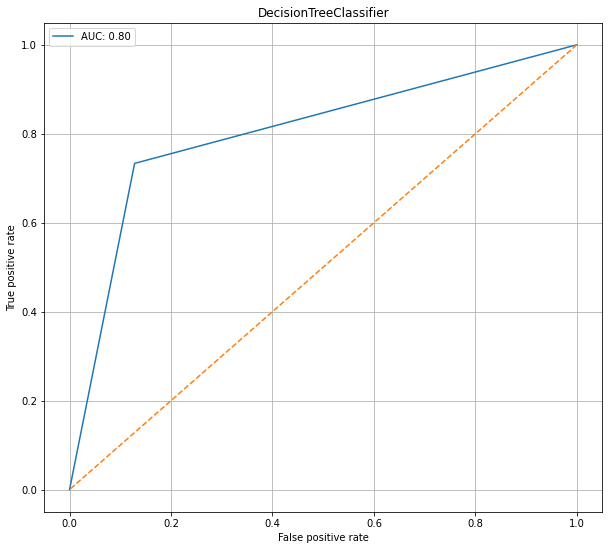

In [52]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

# Saving the model

In [53]:
import joblib
joblib.dump(clf.best_estimator_,"PJ10_Insurance.obj")
SVR_from_joblib=joblib.load("PJ10_Insurance.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0])

In [54]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
Predicted,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0
